# WeatherPy
----


### Analysis

- The most obvious trend analyzed from the weather data is that cities closest to the equator tend to be the warmest, and the cities furthest away, are the coldest. 
- A suprising find is that in the southern hemisphere, there is a negative relationship between latitude and humdity. I assumed the tropical islands would make it more positive, but after my analysis it is obvious that the desert cities near the equator is what makes the correlation negative. 
- There is no strong relationship between latitude and wind speed 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import (weather_api_key, g_key)

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#gmaps.configure(api_key=g_key)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#query_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))


{
    "coord": {
        "lon": -134.9692,
        "lat": -23.1203
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 73.89,
        "feels_like": 74.44,
        "temp_min": 73.89,
        "temp_max": 73.89,
        "pressure": 1021,
        "humidity": 74,
        "sea_level": 1021,
        "grnd_level": 1019
    },
    "visibility": 10000,
    "wind": {
        "speed": 13.94,
        "deg": 93,
        "gust": 14.43
    },
    "clouds": {
        "all": 1
    },
    "dt": 1626121328,
    "sys": {
        "country": "PF",
        "sunrise": 1626104455,
        "sunset": 1626143387
    },
    "timezone": -32400,
    "id": 4030556,
    "name": "Rikitea",
    "cod": 200
}


In [4]:
print(requests.get(query_url + city))


<Response [200]>


In [5]:
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

counter = 0

# Print Starting Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        
        city_record = response["name"]
        print(f"Processing Record {counter} | {city_record}")

        #increment processing record for each loop
        counter += 1
        
        
    except:
        print("City not found. Skipping...") 
    continue
#print end statement  
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")


Beginning Data Retrieval
-------------------------------
Processing Record 0 | Bethel
Processing Record 1 | Carnarvon
Processing Record 2 | Puerto Ayora
Processing Record 3 | Ushuaia
City not found. Skipping...
Processing Record 4 | Palana
Processing Record 5 | Maumere
Processing Record 6 | Saskylakh
Processing Record 7 | São Filipe
Processing Record 8 | Mar del Plata
Processing Record 9 | Pinheiro Machado
Processing Record 10 | Chui
Processing Record 11 | Acajutla
Processing Record 12 | Codrington
Processing Record 13 | Henties Bay
Processing Record 14 | Busselton
Processing Record 15 | Mackay
Processing Record 16 | Carballo
Processing Record 17 | Kirakira
Processing Record 18 | Salalah
Processing Record 19 | Souillac
Processing Record 20 | Buala
City not found. Skipping...
Processing Record 21 | Avera
Processing Record 22 | Vágur
Processing Record 23 | Saint-Philippe
City not found. Skipping...
Processing Record 24 | Hasaki
Processing Record 25 | Arraial do Cabo
Processing Record 26 

Processing Record 225 | Aksay
Processing Record 226 | Pasni
Processing Record 227 | Port Lincoln
Processing Record 228 | Torbay
Processing Record 229 | Tateyama
Processing Record 230 | Barwāni
City not found. Skipping...
Processing Record 231 | Kumul
Processing Record 232 | Riyadh
Processing Record 233 | Mahabalipuram
Processing Record 234 | Den Helder
Processing Record 235 | Fort Smith
Processing Record 236 | Nantucket
Processing Record 237 | Whitehorse
Processing Record 238 | Severomuysk
City not found. Skipping...
Processing Record 239 | Narganá
Processing Record 240 | Oranjestad
Processing Record 241 | Edson
Processing Record 242 | Alice Springs
Processing Record 243 | Mossamedes
Processing Record 244 | Portland
Processing Record 245 | Hobyo
Processing Record 246 | Ituango
Processing Record 247 | Poum
Processing Record 248 | Chokurdakh
Processing Record 249 | Ishigaki
Processing Record 250 | Lagoa
Processing Record 251 | Bowen
Processing Record 252 | Yangi Marg`ilon
Processing Reco

Processing Record 457 | Wanning
Processing Record 458 | Aswān
Processing Record 459 | Tautira
Processing Record 460 | Na Wa
Processing Record 461 | Mossendjo
Processing Record 462 | Wasilla
Processing Record 463 | Esim
Processing Record 464 | Puerto Escondido
Processing Record 465 | Ermelo
Processing Record 466 | St. George's
Processing Record 467 | Sungai Raya
Processing Record 468 | Beira
Processing Record 469 | Isangel
Processing Record 470 | Chapada dos Guimarães
Processing Record 471 | Khanpur
Processing Record 472 | Atar
Processing Record 473 | Departamento de Maldonado
Processing Record 474 | Ayan
Processing Record 475 | Diapaga
Processing Record 476 | Mehamn
Processing Record 477 | Honiara
City not found. Skipping...
Processing Record 478 | Khilok
Processing Record 479 | Tumpat
City not found. Skipping...
Processing Record 480 | Aklavik
Processing Record 481 | Buritis
Processing Record 482 | Saint-Pierre
Processing Record 483 | Katobu
Processing Record 484 | Laas
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_df = pd.DataFrame({
    "City" : city_name,
    "Country" : country,
    "Date" : date,
    "Lat" : latitude,
    "Lng" : longitude,
    "Max Temp" : max_temperature,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed
    
        
})

weather_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,1626121331,41.3712,-73.4140,80.10,86,90,1.99
1,Carnarvon,AU,1626121331,-24.8667,113.6333,66.27,66,40,8.05
2,Puerto Ayora,EC,1626121331,-0.7393,-90.3518,76.96,73,69,10.60
3,Ushuaia,AR,1626121279,-54.8000,-68.3000,33.46,93,90,11.50
4,Palana,RU,1626121332,59.1167,159.9667,46.36,99,100,5.48
5,Maumere,ID,1626121332,-8.6199,122.2111,75.65,79,91,6.93
6,Saskylakh,RU,1626121332,71.9167,114.0833,53.49,58,99,5.82
7,São Filipe,CV,1626121333,14.8961,-24.4956,73.26,81,100,6.17
8,Mar del Plata,AR,1626121323,-38.0023,-57.5575,61.09,65,100,1.99
9,Pinheiro Machado,BR,1626121333,-31.5783,-53.3811,60.78,79,93,4.34


In [12]:
weather_df.to_csv("/Users/ryan/Desktop/bootcamp/homework/hw6_python-api/python-api-challenge/WeatherPy/weather_cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#check if any city has humidity > 100%
high_humidity = weather_df.loc[weather_df["Humidity"] > 100, :]
high_humidity

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

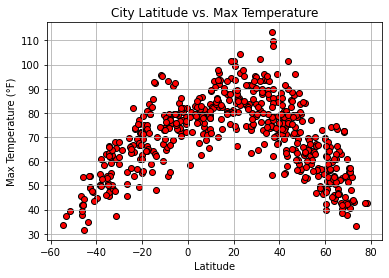

In [14]:
# Build Scatter Plot 
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolors="red", marker="o", edgecolor="black")

# set labels and titles
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("/Users/ryan/Desktop/bootcamp/homework/hw6_python-api/python-api-challenge/WeatherPy/Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

##### The code here is taking all the city latitude data and comparing it to its respective maxiumum temperture data.

## Latitude vs. Humidity Plot

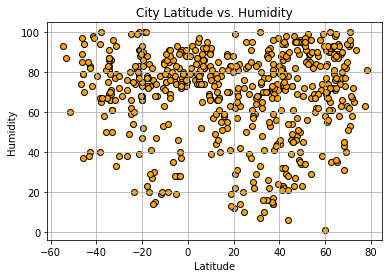

In [15]:
# Build Scatter Plot 
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors="orange", marker="o", edgecolor="black")

# set labels and titles
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("/Users/ryan/Desktop/bootcamp/homework/hw6_python-api/python-api-challenge/WeatherPy/Latitude_vs_Humidity.png")

# Show Plot
plt.show()

##### The code runs the data on each cities latitude and plots it against its corresponding Humidity data.

## Latitude vs. Cloudiness Plot

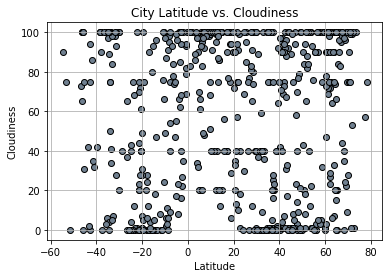

In [16]:
# Build Scatter Plot 
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors="slategrey", marker="o", edgecolor="black")

# set labels and titles
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("/Users/ryan/Desktop/bootcamp/homework/hw6_python-api/python-api-challenge/WeatherPy/Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

#### The code runs the data on each cities latitude and plots it against its corresponding Cloudiness data.

## Latitude vs. Wind Speed Plot

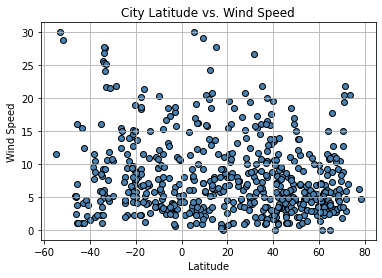

In [17]:
# Build Scatter Plot 
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolors="steelblue", marker="o", edgecolor="black")

# set labels and titles
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("/Users/ryan/Desktop/bootcamp/homework/hw6_python-api/python-api-challenge/WeatherPy/Latitude_vs_Wind-Speed.png")

# Show Plot
plt.show()

##### The code runs the data on each cities latitude and plots it against its corresponding Wind Speed data.

## Linear Regression

In [18]:
#create function to create linear regression in various calls
def linear_regression_plot(df, title_name, y_column, y_label, file_name, xy):

    #set x and y values
    x_values = df['Lat']
    y_values = df[y_column]

    # Perform a linear regression on x and y values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    #plot the line and label
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(f"/Users/ryan/Desktop/bootcamp/homework/hw6_python-api/python-api-challenge/WeatherPy/{file_name}")
    
        

In [19]:
#create northern and southern hemisphere DataFrames
northern_hemi_df = weather_df.loc[weather_df["Lat"]>=0,:]
southern_hemi_df = weather_df.loc[weather_df["Lat"]<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6802544384412749


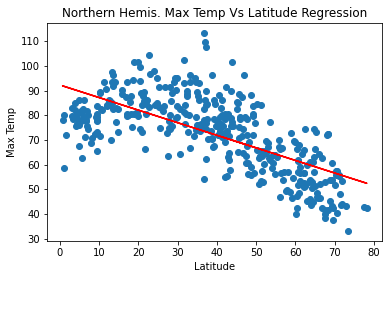

In [20]:
linear_regression_plot(northern_hemi_df,"Northern Hemis. Max Temp Vs Latitude Regression", 
                       'Max Temp', 'Max Temp', 'NorthernMaxTempVsLatitudeReg.png', (10,0))

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.795091758080847


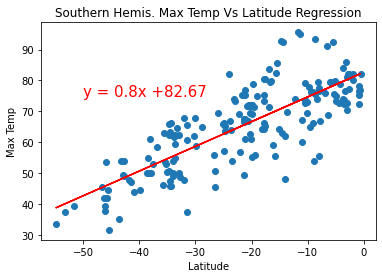

In [21]:
linear_regression_plot(southern_hemi_df,"Southern Hemis. Max Temp Vs Latitude Regression", 
                       'Max Temp', 'Max Temp', 'SouthernMaxTempVsLatitudeReg.png', (-50,75))

The linear regression shows the best fit line between max temperature in a city and its corresponding latitude. There is a strong positive relationship in the southern hemisphere and the inverse in the north. It goes to show the further a city is from the equator, the colder. And the closer the city is to the equator, the hotter. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04554400780860694


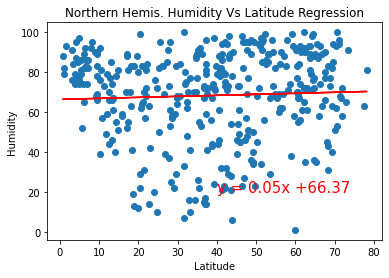

In [22]:
linear_regression_plot(northern_hemi_df,"Northern Hemis. Humidity Vs Latitude Regression", 
                       'Humidity', 'Humidity', 'NorthernHumidityVsLatitudeReg.png', (40,20))



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.12339345784850488


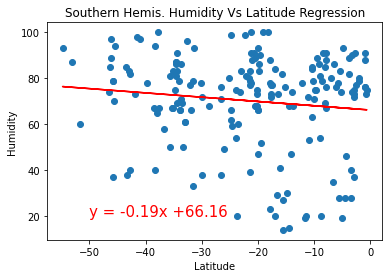

In [23]:
linear_regression_plot(southern_hemi_df,"Southern Hemis. Humidity Vs Latitude Regression", 
                       'Humidity', 'Humidity', 'SouthernHumidityVsLatitudeReg.png', (-50,20))



The linear regression shows the best fit line between humidity percentage in a city and its corresponding latitude. There is a weak positive relationship in the northern hemisphere and the inverse in the southern. The linear regression shows a weak correlation between humidity and latitude, so the cities furthest from the equator are more humid, in both hemispheres.  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.1190107763985676


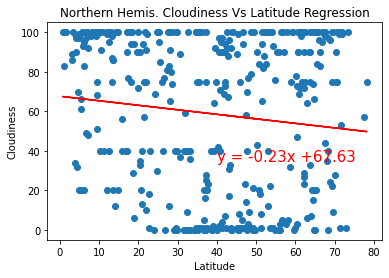

In [24]:
linear_regression_plot(northern_hemi_df,"Northern Hemis. Cloudiness Vs Latitude Regression", 
                       'Cloudiness', 'Cloudiness', 'NorthernCloudinessVsLatitudeReg.png', (40,35))



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.07607759392761089


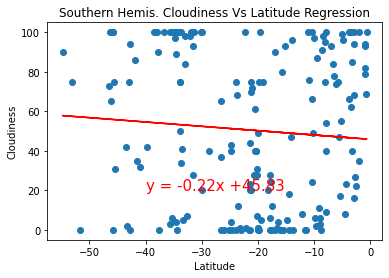

In [25]:
linear_regression_plot(southern_hemi_df,"Southern Hemis. Cloudiness Vs Latitude Regression", 
                       'Cloudiness', 'Cloudiness', 'SouthernCloudinessVsLatitudeReg.png', (-40,20))



The linear regression shows the best fit line between cloudiness percentage in a city and its corresponding latitude. There is a very weak negative relationship in the northern hemisphere and a slightly strong but still weak and negative relationship in the south. The linear regression shows a weak correlation between clouds and latitude, with the North having almost no correlation between the two at all. In the Southern Hemisphere, the cities closer to the equator have less clouds, according to the linear regression.   

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.12484073586297727


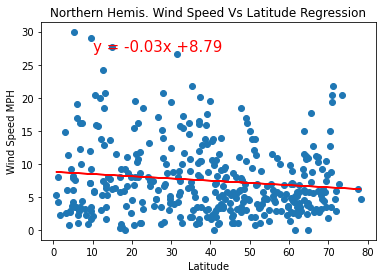

In [26]:
linear_regression_plot(northern_hemi_df,"Northern Hemis. Wind Speed Vs Latitude Regression", 
                       'Wind Speed', 'Wind Speed MPH', 'NorthernWindSpeedVsLatitudeReg.png', (10,27))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1335805114588498


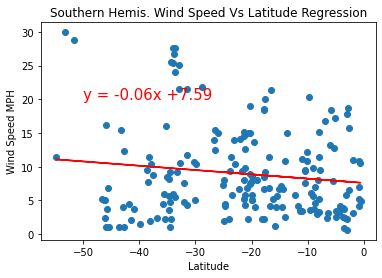

In [27]:
linear_regression_plot(southern_hemi_df,"Southern Hemis. Wind Speed Vs Latitude Regression", 
                       'Wind Speed', 'Wind Speed MPH', 'SouthernWindSpeedVsLatitudeReg.png', (-50,20))

The linear regression shows the best fit line between wind speed  in a city and its corresponding latitude. In both the northern and southern hemisphere there is a very very weak negative correlation between wind speed and latitude. So it is difficult to draw conclusions on where a city is, in relation to the equator, and how fast wind is in the city. 